# COGS 108 - Team 108 - Crash Analysis

https://www.youtube.com/watch?v=_OTG61Lgb_o

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

# Overview

The aim of this project is to investigate the effects of environmental conditions, vehicle type, and substance abuse on the severity and frequency of traffic accidents in Montgomery County, MD. By analyzing these factors, the project seeks to develop a predictive model to estimate the severity of car accidents. This research will provide valuable insights into the contributing factors of traffic accidents and help improve road safety measures in the county.

# Names

- Neil Damle
- Pavit Saluja
- Ahladita Lotti
- David Cook
- Daniel Finn

<a id='research_question'></a>
# Research Question

***What (if any) are the effects of environmental conditions, vehicle type and substance abuse on the severity and frequency of traffic accidents in Montgomery County, MD? Based on these factors, can we predict the severity of car accidents?***

We further changed our original research question to narrow the scope of the question in terms of variables; we have now decided to focus on Environmental Conditions (Time/Weather), Vehicle Type, and Driver Condition as our key factors. We also narrowed the scope of the question to Montgomery County specifically due to the best avaiable dataset only consisting on information from that area. As a result, any findings from this dataset will only be relevant to that area.

<a id='background'></a>

## Background & Prior Work

Car crashes are a major cause of injury and death around the world, and a variety of factors can contribute to the frequency of their occurrence and severity such as driver behavior, substance abuse, vehicle design and maintenance, road conditions, weather, and environmental factors. Driver behavior includes actions such as distracted driving, speeding, reckless driving, and driving under the influence of drugs or alcohol [^Shiner]. Vehicle design and maintenance play a critical role, as poorly designed or maintained vehicles can be more prone to accidents [^Shiner]. Road conditions, such as potholes or uneven surfaces, can also be a factor in car crashes. Weather conditions, such as rain, snow, or fog, can also make driving more hazardous [^Shiner]. Finally, environmental factors such as wildlife or debris on the road can contribute to car crashes. 

As young drivers, we wanted to looking into traffic data to help us identify patterns and trends in accidents, such as common causes, locations, and times of day. Regularly tracking and analyzing car crash data can help monitor progress in reducing the number and severity of accidents over time. According to a recent study, measuring the impact of weather conditions on the severity of car crashes could lead to developing strategies and policies aimed at reducing property damage and injuries sustained by people on the road [^Azar]. Car crash data can also help insurance companies to assess risk.

The severity of car accidents based on these factors varies widely, but we would assume that, for example, a higher blood alcohol level and/or worse weather would increase both the likelihood and the severity of an accident, if one were to occur in such conditions. After doing our initial research, we have found that drunk driving and speeding were two of the principal causes of car accidents in the United States. Intoxicated drivers accounted for about 35% of all fatal motor vehicle accidents, and the majority of these accidents occurred at night as opposed to during the day [^Forbes]. Speeding is a close second in regards to the fact that it is responsible for about 29% of car crashes [^Forbes]. In regards to the time that most car accidents occur, there is an increased likelihood of car accidents during the weekend days and holidays, and a large portion of fatal accidents occur between 6 pm and midnight [^Forbes].

Citations -

[^Shiner]: Shiner Law Group. (6 Oct 2022). 8 factors that contribute to car crashes. Retrieved from https://shinerlawgroup.com/8-factors-that-contribute-to-car-crashes/

[^Azar]: Azar, N. R., Lee, A., Wilson, A., & Cunningham, R. M. (2020). Distracted driving: A primer for emergency physicians. Western Journal of Emergency Medicine, 21(3), 690–696. doi: 10.5811/westjem.2020.3.46872

[ ^Forbes]: Bieber, Christy (23 Jan 2023) Car Accident Statistics for 2023. Forbes Advisor.

# Hypothesis


**We predict that the key factors that influence accident severity are substance abuse and vehicle type, and the factors that will influence accident frequency are weather and time. More specifically, we think that because of smaller cars have less protection, and drivers who are under the influence may drive more erratically, these factors would have more serious accidents. On the other hand, we predicted that there might be more accidents at night or during bad weather, even if they may be less severe (skidding off the road, but no crash, for example).**

# Dataset(s)

- Dataset Name: Crash Reporting - Drivers Data
- Link to the dataset:  https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Drivers-Data/mmzv-x632
- Number of observations: 161,000

# Setup

In [1]:
# Importing libraries used for cleaning data
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date

#imports for EDA
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from scipy.stats import chisquare
import statsmodels.api as sm
import patsy
from sklearn.metrics import r2_score

In [2]:
# Read csv file and store as df
df = pd.read_csv("Crash_Reporting_-_Drivers_Data.csv")

/Users/neildamle/opt/anaconda3/envs/dsc80/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3442: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#previewing the dataframe
df.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,DD5620004G,190046109,Rockville Police Departme,Property Damage Crash,09/26/2019 07:20:00 AM,NaN,NaN,NaN,NaN,PARKING LOT,...,15,No,No,2017,THOMAS,BUS,NO MISUSE,39.103518,-77.157669,"(39.10351817, -77.15766933)"
1,MCP29620057,200023865,Montgomery County Police,Property Damage Crash,06/18/2020 02:00:00 AM,County,DAIRYMAID DR,County,METZ DR,NaN,...,35,No,No,2020,UNK,UNK,UNKNOWN,39.154847,-77.271245,"(39.15484667, -77.271245)"
2,MCP2651004P,210035267,Montgomery County Police,Property Damage Crash,09/08/2021 12:30:00 PM,NaN,NaN,NaN,NaN,PARKING LOT OF 10109 COLESVILLE RD,...,0,No,No,2010,TOYOTA,SUV,UNKNOWN,39.020303,-77.011436,"(39.02030267, -77.01143583)"
3,MCP3050004K,200016465,Montgomery County Police,Property Damage Crash,04/19/2020 03:39:00 PM,County,RUSSETT RD,County,ARCTIC AVE,NaN,...,25,No,No,2004,DODGE,GRAND CARAVAN,NO MISUSE,39.080062,-77.097845,"(39.08006167, -77.097845)"
4,MCP2641001J,200016526,Montgomery County Police,Injury Crash,04/20/2020 09:15:00 AM,County,ARCHDALE RD,County,GUNNERS BRANCH RD,NaN,...,25,No,No,2006,HONDA,CR-V,UNKNOWN,39.175230,-77.241090,"(39.17523, -77.24109)"


# Data Cleaning

Describe your data cleaning steps here.

In [4]:
# Previewing column names before keeping what is needed
df.columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Type',
       'Cross-Street Name', 'Off-Road Description', 'Municipality',
       'Related Non-Motorist', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID',
       'Driver At Fault', 'Injury Severity', 'Circumstance',
       'Driver Distracted By', 'Drivers License State', 'Vehicle ID',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Second Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Equipment Problems', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [5]:
#extract relevant columns
df = df[['ACRS Report Type',
       'Crash Date/Time', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse',
       'Driver At Fault', 'Injury Severity',
       'Driver Distracted By',
       'Vehicle Damage Extent', 'Vehicle First Impact Location','Vehicle Body Type','Speed Limit','Vehicle Year',
       'Vehicle Make','Location']]

In [6]:
#convert Crash Date/Time to DateTime, split into two columns, drop original column
df['Crash Date/Time'] = pd.to_datetime(df['Crash Date/Time'])
df['Date'] = df['Crash Date/Time'].apply(lambda x: x.date())
df['Time'] = df['Crash Date/Time'].apply(lambda x: x.time())
df = df.drop(['Crash Date/Time'], axis=1)

In [7]:
# Substituting "UNKNOWN" for the null values and checking to see 0 null values 
df = df.fillna('UNKNOWN')
df.isna().sum()

ACRS Report Type                 0
Collision Type                   0
Weather                          0
Surface Condition                0
Light                            0
Traffic Control                  0
Driver Substance Abuse           0
Driver At Fault                  0
Injury Severity                  0
Driver Distracted By             0
Vehicle Damage Extent            0
Vehicle First Impact Location    0
Vehicle Body Type                0
Speed Limit                      0
Vehicle Year                     0
Vehicle Make                     0
Location                         0
Date                             0
Time                             0
dtype: int64

In [8]:
#Create ordinal versions of columns to allow for potential analysis in the future
df['Injury_Ordinal'] = df['Injury Severity'].map({'NO APPARENT INJURY':0, "POSSIBLE INJURY":1,
                                                  "SUSPECTED MINOR INJURY":2, "SUSPECTED SERIOUS INJURY":3,
                                                 "FATAL INJURY":4})
df['Damage_Ordinal'] = df['Vehicle Damage Extent'].map({'UNKNOWN':0, 'NO DAMAGE':0,'OTHER':0, "SUPERFICIAL":1,
                                                  "FUNCTIONAL":2, "DISABLING":3,
                                                 "DESTROYED":4})


In [9]:
#standardizing the make of the car (there were previously many typos and other issues)
def standardize_make(str_in):
    
    try:
        str_in = str_in.lower()
        str_in = str_in.strip()

        if 'toy' in str_in:
            str_in = 'Toyota'
        elif 'hon' in str_in:
            str_in = 'Honda'
        elif 'for' in str_in:
            str_in = 'Ford'
        elif 'nis' in str_in:
            str_in = 'Nissan'
        elif 'dod' in str_in:
            str_in = 'Dodge'
        elif 'hyu' in str_in:
            str_in = 'Hyundai'
        elif 'chev' in str_in:
            str_in = 'Chevrolet'    
        elif 'je' in str_in:
            str_in = 'Jeep'
        elif 'bmw' in str_in:
            str_in = 'Bmw'
        elif 'acu' in str_in:
            str_in = 'Acura'
        elif 'lex' in str_in:
            str_in = 'Lexus'
        elif 'ki' in str_in:
            str_in = 'Kia'
        elif 'sub' in str_in:
            str_in = 'Subaru'
        elif 'maz' in str_in:
            str_in = 'Mazda'
        elif 'mer' in str_in:
            str_in = 'Mercedes'
        else:
            str_in = 'Other'
    except:
        output = np.nan
        
    output = str_in  
    
    return output

df['Vehicle Make'] = df['Vehicle Make'].apply(standardize_make)

In [10]:
# Final Dataframe Preview
df.head()

,ACRS Report Type,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Driver At Fault,Injury Severity,Driver Distracted By,...,Vehicle First Impact Location,Vehicle Body Type,Speed Limit,Vehicle Year,Vehicle Make,Location,Date,Time,Injury_Ordinal,Damage_Ordinal
0,Property Damage Crash,SINGLE VEHICLE,CLEAR,UNKNOWN,DAYLIGHT,UNKNOWN,NONE DETECTED,Yes,NO APPARENT INJURY,NOT DISTRACTED,...,TWELVE OCLOCK,SCHOOL BUS,15,2017,Other,"(39.10351817, -77.15766933)",2019-09-26,07:20:00,0,1
1,Property Damage Crash,OTHER,CLOUDY,DRY,UNKNOWN,UNKNOWN,UNKNOWN,Yes,NO APPARENT INJURY,UNKNOWN,...,UNKNOWN,UNKNOWN,35,2020,Other,"(39.15484667, -77.271245)",2020-06-18,02:00:00,0,0
2,Property Damage Crash,OTHER,CLEAR,UNKNOWN,DAYLIGHT,UNKNOWN,UNKNOWN,Yes,NO APPARENT INJURY,UNKNOWN,...,SIX OCLOCK,(SPORT) UTILITY VEHICLE,0,2010,Toyota,"(39.02030267, -77.01143583)",2021-09-08,12:30:00,0,1
3,Property Damage Crash,OTHER,CLEAR,DRY,DAYLIGHT,NO CONTROLS,ALCOHOL PRESENT,Yes,NO APPARENT INJURY,UNKNOWN,...,TWELVE OCLOCK,VAN,25,2004,Dodge,"(39.08006167, -77.097845)",2020-04-19,15:39:00,0,3
4,Injury Crash,OTHER,CLOUDY,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,Yes,POSSIBLE INJURY,UNKNOWN,...,ELEVEN OCLOCK,PASSENGER CAR,25,2006,Honda,"(39.17523, -77.24109)",2020-04-20,09:15:00,1,3


# Data Cleaning Process Description
The data cleaning process started with keeping the columns that we decided were most relevant for our question. From there we split the Date and Time column into two separate columns (and dropped the original) that would allow for more detailed analysis in the future.

After looking at all the columns with null values, we decided that UNKNOWN was the best label for data that had null values based on the fact that there were already values that had that label. This meant that in cases where rows had null values, we could replace it with UNKNOWN -> this would allow us to ensure that data was labeled consistently and efficiently.

Lastly, we created ordinal versions of the columns using a map so that we can conduct analysis in the future parts of the project with integer values rather than strings. This also allows us to rank different labels, for example we could look for collisions more severe than SUPERFICIAL using the numeric values.

Overall, after this process, we feel well prepared to begin analysis in the next part of the project.


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [11]:
# create dataframes where Injury/Damage levels are high
df_severe_damage = df[df["Damage_Ordinal"] >= 4]
df_severe_injury = df[df["Injury_Ordinal"] >= 3]
df_severe_injury_special = df[df["Injury_Ordinal"] >= 2]

## Uni-Variate Distributions

<AxesSubplot:xlabel='Injury_Ordinal', ylabel='Count'>

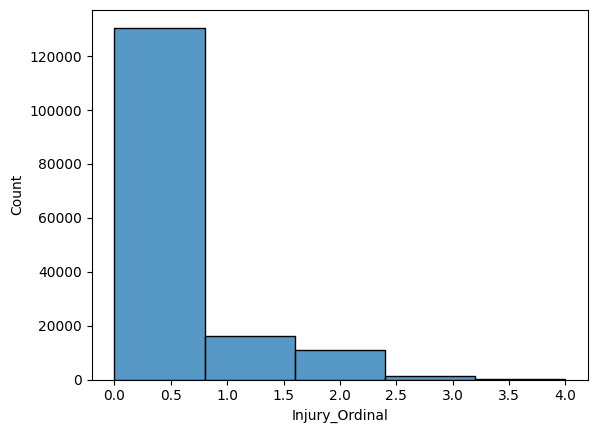

In [12]:
# Plotting the distribution of severity of accidents
sns.histplot(data=df,x='Injury_Ordinal',bins = 5)

We can see that a vast majority of the collisions result little to no human injury. More specifically, we can see that over 120000 people who are in these accidents are either not harmed or have very minor injuries. There is a massive drop off to the higher (more severe) injury ratings in these accidents, with the count of the highest injury rating being less than 1000.

<AxesSubplot:xlabel='Damage_Ordinal', ylabel='Count'>

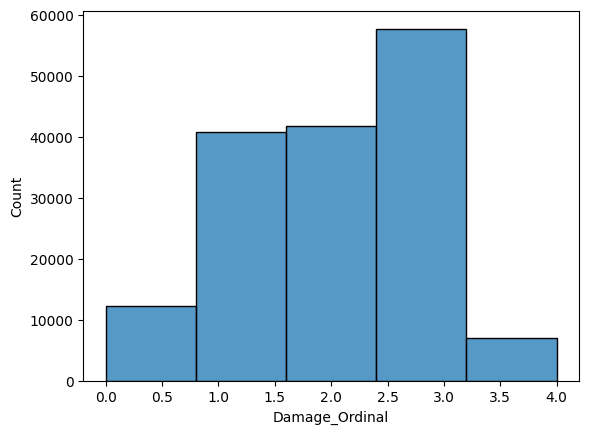

In [13]:
# Plotting the distribution of damage to the vehicle
sns.histplot(data=df,x='Damage_Ordinal',bins=5)

Unlike the histogram of Injury ratings, the Damage ratings are much more normally distributed. There is a peak of about 57,000 occurences of 3 on the scale, which refers to the "Disabling" rating, while the next two highest ratings (Superficial and Functional) have about 40,000 ratings. Finally, the least common category is "Destroyed".


### Time of Day vs Injury/Damage

In [14]:
# defining and applying a function that converts all times to minutes past midnight
def time_to_min(t_in):
    minutes = t_in.minute + t_in.hour * 60
    return minutes

df['Minutes'] = df['Time'].apply(time_to_min)

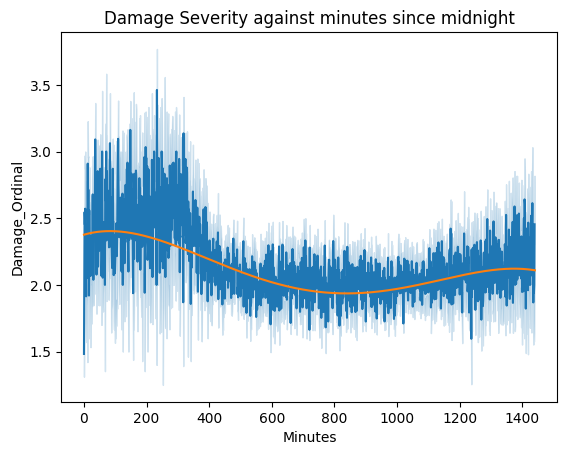

Polynomial Regression r^2: 0.010999952465145513


In [15]:
#Plotting damage severity with respect to time 
"""
From this plot we can see that it appears that crashes that occur in the first 5 hours (300 minutes) after midnight
have a higher average damage level than during other parts of the day
"""
sns.lineplot(data=df,x='Minutes',y='Damage_Ordinal').set(title='Damage Severity against minutes since midnight')
# running polynomial regression between minutes and damage
model = np.poly1d(np.polyfit(df['Minutes'], df['Damage_Ordinal'], 4))
line = np.linspace(0, 1440, 720)
plt.plot(line, model(line))
plt.show()
print("Polynomial Regression r^2: " + str(r2_score(df['Damage_Ordinal'], model(df['Minutes']))))

In [16]:
# running linear regression between minutes and damage severity
outcome_min_dam, predictor_min_dam = patsy.dmatrices('Damage_Ordinal ~ Minutes', df)
mod_min_dam = sm.OLS(outcome_min_dam, predictor_min_dam)
res_min_dam = mod_min_dam.fit()
print(res_min_dam.summary())

                            OLS Regression Results                            
Dep. Variable:         Damage_Ordinal   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     434.5
Date:                Sun, 11 Jun 2023   Prob (F-statistic):           2.26e-96
Time:                        23:08:46   Log-Likelihood:            -2.3313e+05
No. Observations:              159357   AIC:                         4.663e+05
Df Residuals:                  159355   BIC:                         4.663e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1840      0.007    296.596      0.0

***Analysis***: The previous 3 cells look at the relationship between Time of Day and Damage Severity. By looking at the plot, it does appear that these is some sort of trend/relationship between the two variables, with a peak in the first 300 minutes of the day (between 12:00am and 3:00 am), after which the average damage then goes below below 2 on the ordinal scale. While these is a slight increase again later at night, it doesn't reach as high as it does in the early morning. 

Despite this percived trend, the correlation coefficients of both the polynomial regression and linear regression are extremely low (.011 and .003 respectively) implying that the relationship is not particularly strong, at least between these two variables. One reason for this could be the excessive amount of noise in this dataset, with over 150,000 datapoints, there will likely be a lot of variance within each severity category.

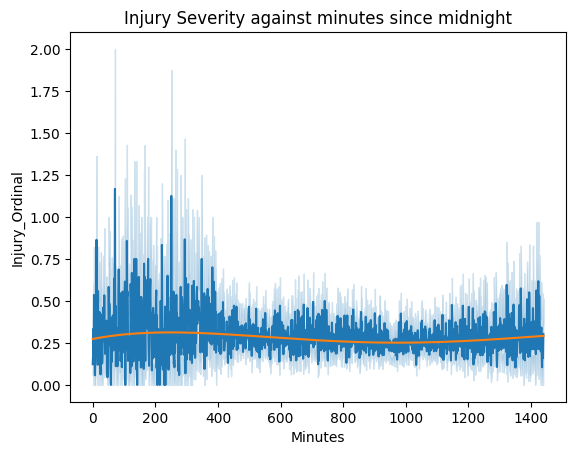

Polynomial Regression r^2: 0.0008153304158351471


In [17]:
# Plotting injury severity with respect to time
"""
From this plot, it appears that the average rate of injury stays constant throughout the day, but there are spikes
in the early hours of the day.
"""
sns.lineplot(data=df,x='Minutes',y='Injury_Ordinal').set(title='Injury Severity against minutes since midnight')
model = np.poly1d(np.polyfit(df['Minutes'], df['Injury_Ordinal'], 4))
line = np.linspace(0, 1440, 720)
plt.plot(line, model(line))
plt.show()
print("Polynomial Regression r^2: " + str(r2_score(df['Injury_Ordinal'], model(df['Minutes']))))

In [18]:
outcome_min_inj, predictor_min_inj = patsy.dmatrices('Injury_Ordinal ~ Minutes', df)
mod_min_inj = sm.OLS(outcome_min_inj, predictor_min_inj)
res_min_inj = mod_min_inj.fit()
print(res_min_inj.summary())

                            OLS Regression Results                            
Dep. Variable:         Injury_Ordinal   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     58.29
Date:                Sun, 11 Jun 2023   Prob (F-statistic):           2.28e-14
Time:                        23:09:21   Log-Likelihood:            -1.5236e+05
No. Observations:              159357   AIC:                         3.047e+05
Df Residuals:                  159355   BIC:                         3.047e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3011      0.004     67.877      0.0

***Analysis***: Next, we decided to compare the results of Time of Day vs Damage Severity to Time of Day vs Injury Severity. In the plot, we can see that the trend is much flatter than it was in Time vs Damage. This is likely due to the skew of the Injury Severity variable. If you look closely, however, it does appear that it follows the same trend of peaking the the early morning. 

After fitting both polynomial and linear regression models, we can see that the strength of the relationship between Time of Day and Injury Severity is even weaker than it was for Time vs Damage, continuing to suggest that Damage and Injury severity weren't related to solely the time of day.

### Time of Year vs Injury/Damage

In [19]:
# Defining and applying a function that converts dates into days from January 1st
def days_since_jan1(d_in):
    first = date(d_in.year,1,1)
    return (d_in - first).days
df['Days_Since_Jan_1'] = df['Date'].apply(days_since_jan1)

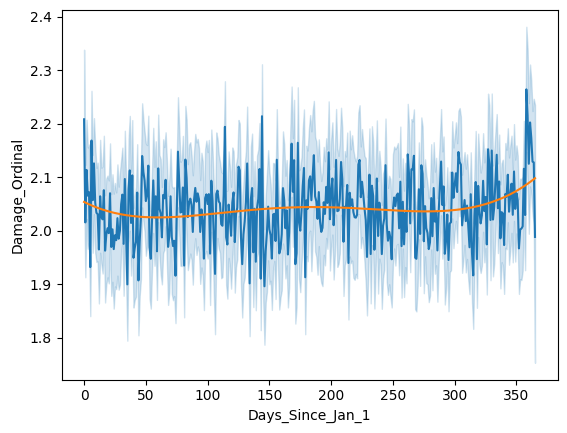

Polynomial Regression r^2: 0.0001469592324865321


In [20]:
# Plotting Vehicle Damage Values against Days of the Year
"""
It's interesting to note that there isn't the same peak in the summer values, instead it appears that the peak occurs
during the winter.
""" 
sns.lineplot(data=df,x='Days_Since_Jan_1',y='Damage_Ordinal')
model = np.poly1d(np.polyfit(df['Days_Since_Jan_1'], df['Damage_Ordinal'], 4))
line = np.linspace(0, 365, 300)
plt.plot(line, model(line))
plt.show()
# outputting the r^2 value of the polynomial model
print("Polynomial Regression r^2: " + str(r2_score(df['Damage_Ordinal'], model(df['Days_Since_Jan_1']))))

In [21]:
outcome_day_dam, predictor_day_dam = patsy.dmatrices('Damage_Ordinal ~ Days_Since_Jan_1', df)
mod_day_dam = sm.OLS(outcome_day_dam, predictor_day_dam)
res_day_dam = mod_day_dam.fit()
print(res_day_dam.summary())

                            OLS Regression Results                            
Dep. Variable:         Damage_Ordinal   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     9.336
Date:                Sun, 11 Jun 2023   Prob (F-statistic):            0.00225
Time:                        23:09:32   Log-Likelihood:            -2.3334e+05
No. Observations:              159357   AIC:                         4.667e+05
Df Residuals:                  159355   BIC:                         4.667e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.0268      0.005  

***Analysis***: In a similar format to before, we decided to investigate the relationship between the day of the year and damage severity, using plots, polynomial regression, and linear regression. If we look at the visual, we can see that there is a slight spike in the very latter part of the year, starting in early to mid-December. While we may assume that this behavior may come from the Holiday season, we cannot draw any conclusions from this plot.

Interestingly, if we analyze the regression results, then we can note that there is statistically no correlation between whether accidents with more damage severity occur on a certain number of days after January 1st, since the R-squared values are either 0 or very close to it. This would mean that there is not a strong relationship between the day of the year and collision damage severity. 


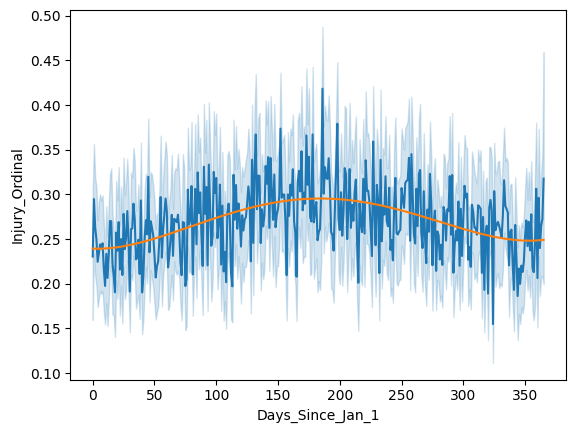

Polynomial Regression r^2: 0.0008593859370469303


In [22]:
# Plotting Injury Values against Days of the Year
sns.lineplot(data=df,x='Days_Since_Jan_1',y='Injury_Ordinal')
model = np.poly1d(np.polyfit(df['Days_Since_Jan_1'], df['Injury_Ordinal'], 4))
line = np.linspace(0, 365, 300)
plt.plot(line, model(line))
plt.show()
print("Polynomial Regression r^2: " + str(r2_score(df['Injury_Ordinal'], model(df['Days_Since_Jan_1']))))

In [23]:
outcome_day_inj, predictor_day_inj = patsy.dmatrices('Injury_Ordinal ~ Days_Since_Jan_1', df)
mod_day_inj = sm.OLS(outcome_day_inj, predictor_day_inj)
res_day_inj = mod_day_inj.fit()
print(res_day_inj.summary())

                            OLS Regression Results                            
Dep. Variable:         Injury_Ordinal   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.845
Date:                Sun, 11 Jun 2023   Prob (F-statistic):              0.174
Time:                        23:09:43   Log-Likelihood:            -1.5239e+05
No. Observations:              159357   AIC:                         3.048e+05
Df Residuals:                  159355   BIC:                         3.048e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2658      0.003  

***Analysis***: Now looking at the relationship between day of the year and Injury Severity, we can see that there is no longer a peak at the very end of the year; instead, there is a very wide peak in the middle of the year(spring/summer months).

Like before, the polynomial and linear relationships displayed a very low correlation, due to a r-squared value of essentially 0.

### Vehicle Make vs Injury/Damage

<AxesSubplot:ylabel='Vehicle Make'>

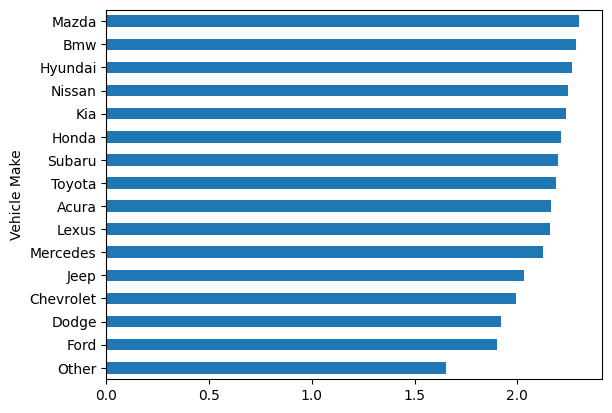

In [24]:
damage_make = df[['Vehicle Make', 'Damage_Ordinal']].groupby('Vehicle Make').mean()
damage_make = damage_make['Damage_Ordinal'].sort_values()
damage_make.plot(kind = 'barh')

In [25]:
# Running a chi-squared test to assess distrubition of vehicles in Severe accidents
obs_damage_make = df_severe_damage["Vehicle Make"].value_counts()
exp_damage_make = df["Vehicle Make"].value_counts()*df_severe_damage.shape[0]/df.shape[0]
chisquare(obs_damage_make, f_exp = exp_damage_make)

Power_divergenceResult(statistic=79.58815706736956, pvalue=8.306418289685414e-11)

<AxesSubplot:ylabel='Vehicle Make'>

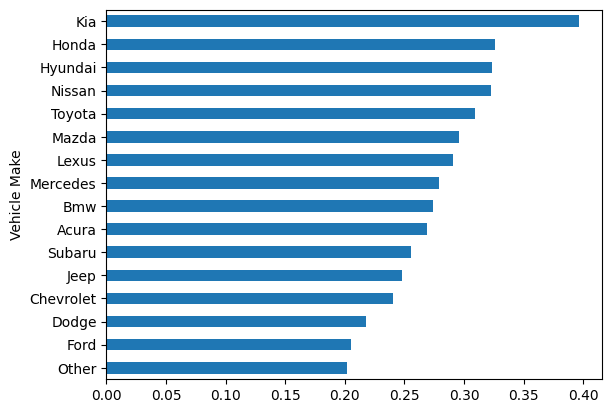

In [26]:
# Checking which company makes the safest cars for people
injury_make = df[['Vehicle Make', 'Injury_Ordinal']].groupby('Vehicle Make').mean()
injury_make = injury_make['Injury_Ordinal'].sort_values()
injury_make.plot(kind = 'barh')

In [27]:
# Chi-squared tests for different vehicle makes
bmw = df[df['Vehicle Make'] == "Bmw"]
bmw_obs = bmw['Injury Severity'].value_counts()
bmw_exp = df['Injury Severity'].value_counts() * bmw.shape[0] / df.shape[0]
kia = df[df['Vehicle Make'] == "Kia"]
kia_obs = kia['Injury Severity'].value_counts()
kia_exp = df['Injury Severity'].value_counts() * kia.shape[0] / df.shape[0]
ford = df[df['Vehicle Make'] == "Ford"]
ford_obs = ford['Injury Severity'].value_counts()
ford_exp = df['Injury Severity'].value_counts() * ford.shape[0] / df.shape[0]
print("BMW: " + str(chisquare(bmw_obs, f_exp = bmw_exp).pvalue))
print("KIA: " + str(chisquare(kia_obs, f_exp = kia_exp).pvalue))
print("OTHER: " + str(chisquare(ford_obs, f_exp = ford_exp).pvalue))

BMW: 0.7410917941198117
KIA: 1.4351001451140068e-29
OTHER: 2.466639689545614e-40


***Analysis***: In this section, we assessed the effects of the vehicle's make on both Injury and Damage severity. In the first plot, showing the average damage for different automotive brands, we can see that there isn't really much variance between brands, but it is interesting to note that the "OTHER" category has the lowest value by a fairly large amount. This may be because less severe crashes may lead to less detailed reporting, causing the Vehicle makes to either me misrepresented or not represented at all. 

In the second plot, there is a clear leader for Injury Severity, as Kia's average score is nearly 20% higher than the score of the next highest, Honda. One of our main takeaways from both of these plots is that the lowst five scores are the same in both plots (Jeep, Chevrolet, Dodge, Ford, and Other), while the tops of the leaderboards are more varied. Our hypothesis is that the lowest four brands all tend to produce large vehicles such as SUVs or trucks, which tend to be safer on average.

We also ran some statistical tests on the data. For both Injury and Damage Severity, our chi-squared tests concluded that the distrubtion of Vehicle Makes in Severe crashes was very unlikely to have occered purely by chance, and there is likely a relationship between Vehicle Make and Severity. We also ran Chi-Squared tests for individual brands, showing that Kia's high average Injury Severity was statistically significant, whereas BMW, having a middle-of-the-pack average value, resulting in showing a non-statisically significant variation in distribution from expected.

### Driver Substance Abuse vs Injury/Damage

<AxesSubplot:ylabel='Driver Substance Abuse'>

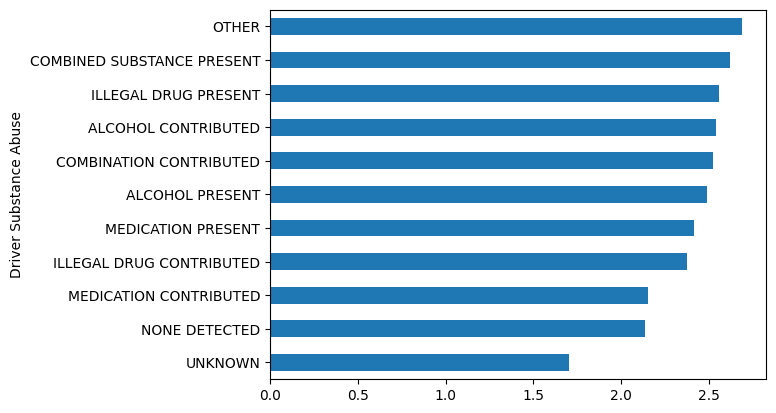

In [28]:
# Checking to see if presence of substance abuse leads to worse accidents
averages_substance = df[['Driver Substance Abuse', 'Damage_Ordinal']].groupby('Driver Substance Abuse').mean()
averages_substance = averages_substance['Damage_Ordinal'].sort_values()
averages_substance.plot(kind = 'barh')

In [29]:
obs_damage_substance = df_severe_damage["Driver Substance Abuse"].value_counts()
exp_damage_substance = df["Driver Substance Abuse"].value_counts()*df_severe_damage.shape[0]/df.shape[0]
chisquare(obs_damage_substance, f_exp = exp_damage_substance)

Power_divergenceResult(statistic=1499.2214195005074, pvalue=0.0)

In [30]:
csp = df[df['Driver Substance Abuse'] == "ILLEGAL DRUG PRESENT"]
csp_obs = csp['Damage_Ordinal'].value_counts()
csp_exp = df['Damage_Ordinal'].value_counts() * csp.shape[0] / df.shape[0]
print("Combined Substances Present: " + str(chisquare(csp_obs, f_exp = csp_exp).pvalue))

Combined Substances Present: 1.509304509384658e-08


<AxesSubplot:ylabel='Driver Substance Abuse'>

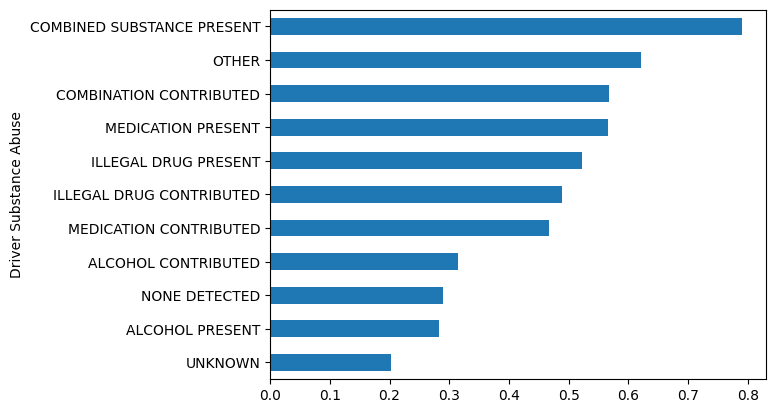

In [31]:
# Checking to see if presence of substance abuse leads to worse accidents
averages_substance = df[['Driver Substance Abuse', 'Injury_Ordinal']].groupby('Driver Substance Abuse').mean()
averages_substance = averages_substance['Injury_Ordinal'].sort_values()
averages_substance.plot(kind = 'barh')
# As one might expect, the most severe crashes occured when multiple substances were involved

In [32]:
obs_injury_substance = df_severe_injury["Driver Substance Abuse"].value_counts()
exp_injury_substance = df["Driver Substance Abuse"].value_counts()*df_severe_injury.shape[0]/df.shape[0]
chisquare(obs_injury_substance, f_exp = exp_injury_substance)

Power_divergenceResult(statistic=280.18413501287824, pvalue=2.380780713719304e-54)

***Analysis***: Next, we looked at the effects of Driver Sustance Abuse on Injury and Damage Severity. While the plots do have a different ordering of categories, "NONE DETECTED" and "UNKNOWN" were the two of the lowest scoring categories, and "COMBINED SUBSTANCE PRESENT" was one of the highest for both. 

Our Chi-Squared tests also supported the hypothesis that there was a relationship between the involvement of substances and accident severity, as it returned statisically significant results for the distribution of substance abuse classifications in both Severe Injury and Severe Damage samples. Furthermore, when looking specificially at the distribution of Damage Severities for accidents where Combined Sustances were present, the test returned a statistically significant p-value, suggesting that there was some relationship/correlation between that substance classification and the distrubtion of damage severity.

### Vehicle Year vs Injury/Damage

In [33]:
# defining and applying a function that cleans the values for the years the vehicle in the collision
def find_year(y_in):
    #If it came out before the model T, I'm not counting it.
    #Dataset was updated in 2023, meaning the newest model would be 2024
    if(y_in < 1908 or y_in > 2024):
        output = np.nan
    else:
        output = y_in
    return output
df['Vehicle_Year'] = df['Vehicle Year'].apply(find_year)

<AxesSubplot:xlabel='Vehicle_Year', ylabel='Injury Severity'>

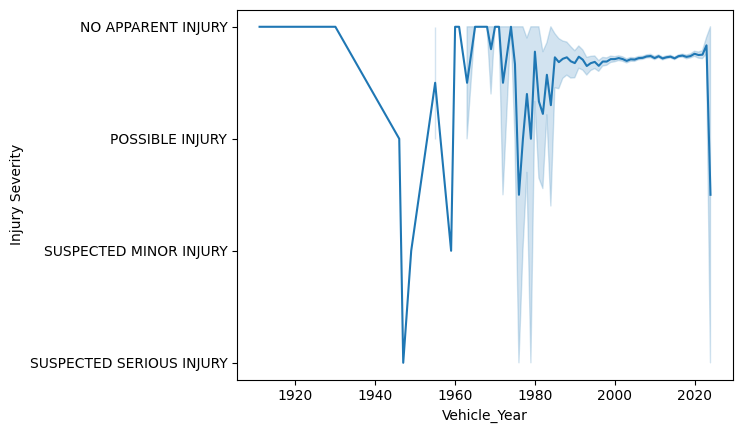

In [34]:
#Do we see injury severity as being conditional on the year of the car
# This plot is very hard to read/understand, likely because of several outliers in terms of older and very new cars.
sns.lineplot(data=df, x='Vehicle_Year',y='Injury Severity',)

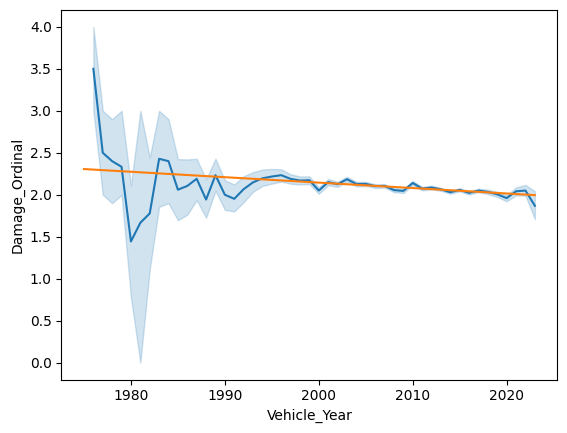

In [35]:
old_cars_removed = df[df['Vehicle_Year'] > 1975]
new_cars_removed = old_cars_removed[old_cars_removed['Vehicle Year'] < 2024]
sns.lineplot(data=new_cars_removed,x='Vehicle_Year',y='Damage_Ordinal')
model = np.poly1d(np.polyfit(new_cars_removed['Vehicle_Year'], new_cars_removed['Damage_Ordinal'], 1))
line = np.linspace(1975, 2023, 50)
plt.plot(line, model(line))
plt.show()

In [36]:
outcome_min_dam, predictor_min_dam = patsy.dmatrices('Damage_Ordinal ~ Vehicle_Year', df)
mod_min_dam = sm.OLS(outcome_min_dam, predictor_min_dam)
res_min_dam = mod_min_dam.fit()
print(res_min_dam.summary())

                            OLS Regression Results                            
Dep. Variable:         Damage_Ordinal   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     238.4
Date:                Sun, 11 Jun 2023   Prob (F-statistic):           9.63e-54
Time:                        23:09:51   Log-Likelihood:            -2.2402e+05
No. Observations:              155488   AIC:                         4.481e+05
Df Residuals:                  155486   BIC:                         4.481e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       14.8765      0.829     17.947   

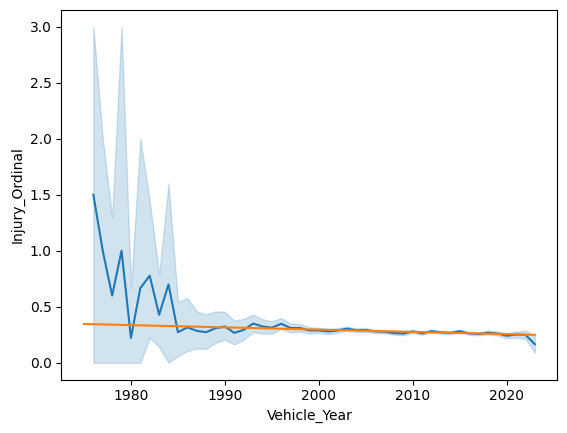

In [37]:
sns.lineplot(data=new_cars_removed,x='Vehicle_Year',y='Injury_Ordinal')
model = np.poly1d(np.polyfit(new_cars_removed['Vehicle_Year'], new_cars_removed['Injury_Ordinal'], 1))
line = np.linspace(1975, 2023, 50)
plt.plot(line, model(line))
plt.show()

In [38]:
outcome_min_dam, predictor_min_dam = patsy.dmatrices('Injury_Ordinal ~ Vehicle_Year', new_cars_removed)
mod_min_dam = sm.OLS(outcome_min_dam, predictor_min_dam)
res_min_dam = mod_min_dam.fit()
print(res_min_dam.summary())

                            OLS Regression Results                            
Dep. Variable:         Injury_Ordinal   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     60.87
Date:                Sun, 11 Jun 2023   Prob (F-statistic):           6.13e-15
Time:                        23:09:54   Log-Likelihood:            -1.4998e+05
No. Observations:              155443   AIC:                         3.000e+05
Df Residuals:                  155441   BIC:                         3.000e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.3255      0.519      8.332   

***Analysis***: The next variable we looked at was the year of the vehicle. We did have to do some further data cleaning in this section, as the first plot showed that the lack of data from earlier years lead to complications in the plot and resulting analyses.

After limiting the scope of the plots, we could indentify a very slight downwards trend for both Injury and Damage Severity when plotted against year. Despite this, however, the regression model yielded a very low r-squared value, suggesting that the relationship between Injury/Damage Severity and the vehicle's year was not very strong.

### Weather Conditions vs Injury/Damage

<AxesSubplot:ylabel='Weather'>

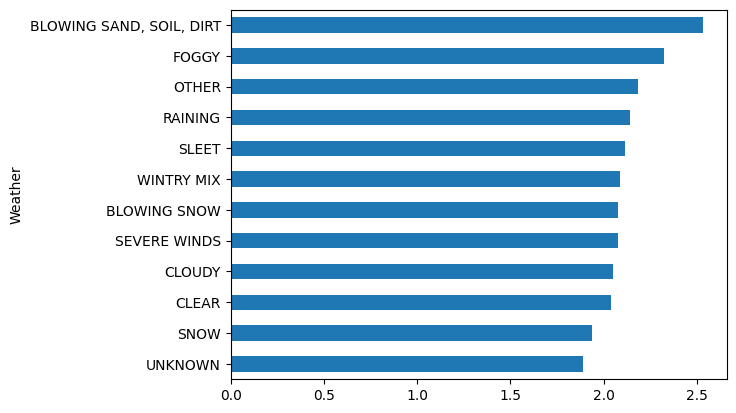

In [39]:
#Plotting Weather and Damage Severity
"""
Blowing sand, soil, dirt is the highest category for both injury and vehicle damage, but there is a difference in 
other categories.
"""
averages_weather2 = df[['Weather', 'Damage_Ordinal']].groupby('Weather').mean()
averages_weather2 = averages_weather2['Damage_Ordinal'].sort_values()
averages_weather2.plot(kind = 'barh')

In [40]:
obs_damage_weather = df_severe_damage["Weather"].value_counts()
exp_damage_weather = df["Weather"].value_counts()*df_severe_damage.shape[0]/df.shape[0]
chisquare(obs_damage_weather, f_exp = exp_damage_weather)

Power_divergenceResult(statistic=26.312451731194827, pvalue=0.0058295657614533675)

In [41]:
rain = df[df['Weather'] == "RAINING"]
rain_obs = rain['Injury Severity'].value_counts()
rain_exp = df['Injury Severity'].value_counts() * rain.shape[0] / df.shape[0]
print("Raining: " + str(chisquare(rain_obs, f_exp = rain_exp).pvalue))
clear = df[df['Weather'] == "CLEAR"]
clear_obs = clear['Injury Severity'].value_counts()
clear_exp = df['Injury Severity'].value_counts() * clear.shape[0] / df.shape[0]
print("Clear: " + str(chisquare(clear_obs, f_exp = clear_exp).pvalue))

Raining: 1.7178527510413606e-05
Clear: 0.1745889081456095


<AxesSubplot:ylabel='Weather'>

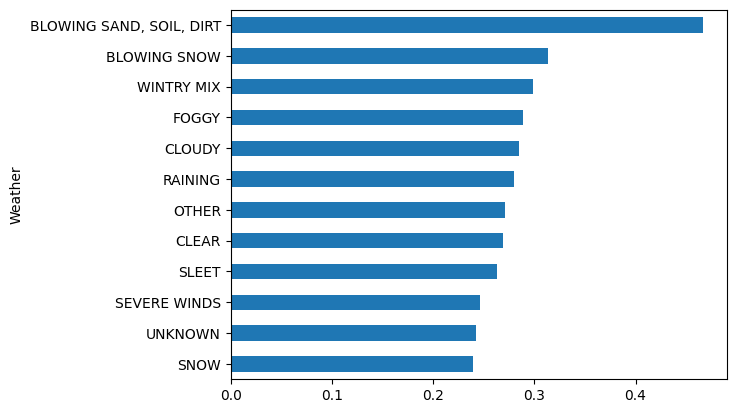

In [42]:
averages_weather2 = df[['Weather', 'Injury_Ordinal']].groupby('Weather').mean()
averages_weather2 = averages_weather2['Injury_Ordinal'].sort_values()
averages_weather2.plot(kind = 'barh')

In [43]:
obs_injury_weather = df_severe_injury_special["Weather"].value_counts()
exp_injury_weather = df["Weather"].value_counts()*df_severe_injury_special.shape[0]/df.shape[0]
chisquare(obs_injury_weather, f_exp = exp_injury_weather)


Power_divergenceResult(statistic=17.85464473793749, pvalue=0.08501522978219998)

***Analysis***: Finally, we wanted to assess the effects of the Weather variable. Following a similar pattern of our other analyses, we plotted the average score for each Weather classifications Injury and Damage Severity Values. From these plots, it was clear that "BLOWING SAND, SOIL, DIRT" had the highest average score in both, which made sense, as this signified extremely bad weather. For the remaining classifications, the results were more varied, with differences between Injury and Damage Severities.

After running our Chi-Squared tests, we had a statisically significant result for the distribution of classifications in accidents with Severe Damages, but for accidents with Severe Injuries, there actually was NOT a statisically significant conclusion. Furthermore, the distribution of Damage Severities was statisically significant for the classification "BLOWING SAND, SOIL, DIRT", but not for the "CLEAR" classification. This made it hard to derive any general significant conlusions.

## Predictive Modeling

Given the lack of conclusive evidence pointing towards the effects of a single variable, we decided to attempt to use a machine learning model to see if Crash Severities could be predicted using all relevant variables.

In [44]:
df = df.dropna()
features = df.copy()

In [45]:
# create a dataset of only features for the model
features = features[['Weather', 'Surface Condition',
       'Light', 'Traffic Control', 'Driver Substance Abuse','Speed Limit','Vehicle Make','Minutes',
       'Vehicle_Year']]

In [46]:
# convert weather into numerical data
features["Weather"] = features['Weather'].replace(
    {"CLEAR": 0, "RAINING": 2, "CLOUDY": 1, "UNKNOWN": 1, "SNOW": 3, "FOGGY": 2, "WINTRY MIX": 3, "OTHER": 1,
    "SLEET": 5, "SEVERE WINDS": 5, "BLOWING SNOW": 5, "BLOWING SAND, SOIL, DIRT": 5})

In [47]:
# convert surface conditions into numerical data
features["Road"] = features['Surface Condition'].replace(
    {'DRY':0, 'WET':1, 'UNKNOWN':1, 'ICE':3, 'SNOW':3, 'SLUSH':3, 'OTHER':1,
       'MUD, DIRT, GRAVEL':2, 'WATER(STANDING/MOVING)':3, 'OIL':3, 'SAND':2})
features = features.drop("Surface Condition", axis=1)

In [48]:
# convert light conditionsinto numerical data
features["Light"] = features['Light'].replace(
    {'DAYLIGHT':0, 'DARK LIGHTS ON':2, 'DARK NO LIGHTS':4, 'DUSK':2, 'DAWN':2,
       'UNKNOWN':2, 'DARK -- UNKNOWN LIGHTING':2, 'OTHER':2})

In [49]:
# convert substance abuse into numerical data
features["substance"] = features['Driver Substance Abuse'].apply(
    lambda x: 4 if ("PRESENT" in x) or ("CONTRIBUTED" in x) or ("COMBINED" in x) else 0)



In [50]:
# convert traffic control into numerical data
features["Traffic Control"] = features['Traffic Control'].apply(lambda x: 1 if x in ["NO CONTROLS", "UNKNOWN", "OTHER"] else 0)

In [51]:
features = features.drop("Driver Substance Abuse", axis=1)
features.head()

,Weather,Light,Traffic Control,Speed Limit,Vehicle Make,Minutes,Vehicle_Year,Road,substance
0,0,0,1,15,Other,440,2017.0,1,0
1,1,2,1,35,Other,120,2020.0,0,0
2,0,0,1,0,Toyota,750,2010.0,1,0
3,0,0,1,25,Dodge,939,2004.0,0,4
4,1,0,1,25,Honda,555,2006.0,0,0


In [52]:
# one-hot encode vehicle make (as make cannot be made ordinal)
one_hot = pd.get_dummies(features['Vehicle Make'], drop_first=True)
features = features.drop('Vehicle Make',axis = 1)
features = features.join(one_hot)

In [53]:
features = features.astype("float64")

In [54]:
# will try to predict Damage Severity (we chose not to try injury severity due to the skew of that distribtion)
df['Vehicle Damage Extent'] = df['Vehicle Damage Extent'].apply(lambda x: "NO DAMAGE" if x in ["UNKNOWN", "OTHER"] else x)
y = df[['Vehicle Damage Extent']]

When building our model, we had to ensure that all of the features were in numeric form. This involved assigning different categories with arbitrary values, which may be a potential issue with the model. Another form of feature engineering we performed was one-hot encoding the vehicle make, as we couldn't assign each make with an ordinal value.

In [55]:
# split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.25, random_state=42)

In [56]:
# import relevant ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [57]:
# after testing a few different classifiers, we decided on a decision tree classifier
model = DecisionTreeClassifier(criterion="entropy",max_depth=11)
#model = KNeighborsClassifier(n_neighbors=4, weights="uniform")
#model = RidgeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11)

After defining the features of the model, we split the data into a training and testing set, and started initializing a machine learning model. We looked into 3 different models, a Decision Tree Classifier, a KNeighbors Classifier, and a Ridge Classifier. We then performed an analysis of each of these models performance on both the testing and training data, eventually landing on what we beleived the optimal combination was. Our final model was a *Decision Tree Classifier with a max depth of 11*. While there were other models that performed much better on the training data, this was the the highest performing model on the testing data, which meant that it would likely perform best on unseen data.


In [58]:
# training data accuracy
train_pred = model.predict(X_train)
train_score = accuracy_score(y_train, train_pred)
train_score

0.4348974411744529

In [59]:
# test data accuracy
test_pred = model.predict(X_test)
test_score = accuracy_score(y_test, test_pred)
test_score

0.4111185429100638

In [60]:
# classification report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

   DESTROYED       0.14      0.01      0.02      1752
   DISABLING       0.42      0.83      0.56     14357
  FUNCTIONAL       0.29      0.04      0.08     10290
   NO DAMAGE       0.14      0.01      0.01      2396
 SUPERFICIAL       0.40      0.36      0.38     10077

    accuracy                           0.41     38872
   macro avg       0.28      0.25      0.21     38872
weighted avg       0.35      0.41      0.33     38872



In [61]:
# feature importances used by the model
pd.DataFrame(model.feature_importances_, index=features.columns)

,0
Weather,0.027207
Light,0.020859
Traffic Control,0.022656
Speed Limit,0.366361
Minutes,0.239505
Vehicle_Year,0.096429
Road,0.022113
substance,0.038959
Bmw,0.000541
Chevrolet,0.014648


### Model Analysis

Overall, this model's accuracy was .411, which means that it predicted the correct category about 41% of the time. Given that there were 5 categories, choosing randomly would result in a correct guess about 20% of the time, so this performance was not too bad given that context. However, upon looking at the classification report, we can see that the model had high recall in two categories, "DISABLING" and "SUPERFICIAL", and very low values for the other categories. This suggested that the model was mostly selecting between these two classifications, which made sense as they were on opposite ends of the spectrum. This did mean that the model's prediction was not very good across all categories, and is definitely something that is a shortcoming in this analysis.

Another takeaway we had from the predictive modeling part of this analysis was that the feature that the model relied on the most when making a prediction was actually the road's speed limit. The next highest features were time of day and vehicle year. Out of all of the vehicle makes, the most important feature was Ford.

# Ethics & Privacy

Privacy Considerations:
This dataset involves information related to motor vehicle operators involved in traffic collisions.  It is crucial to respect the privacy and confidentiality of individuals involved in these incidents since we will be handling data concerning injuries and car accidents and we need to consider health-related information and ensure appropriate handling and accountability. Fortunately, our dataset does not contain any identifying information about the individuals involved in the accidents.

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion


## Limitations:

The data we analyzed only regarded data from crashes, this means it is unequipped to analyze any form of accident avoidance features or non-accident safety measures for cars. As well, the data comes from preliminary reports, meaning it may be incorrect about the severity of injury or damage to a vehicle, as it is in a range from no suspected injury to suspected severe injury, and similar for damage.

## Biases:
Some of them rely on manually created police reports, which could reflect the biases of the reporters as well as have errors in handling the data. As a more specific example, the Montgomery County dataset warns that information hadn’t yet been verified by a full investigation, and could be subject to change. In this case, we may be working with data that doesn’t fully reflect the actual information about the crash and we have been mindful of that when drawing conclusions from the data.


## Data Legitimacy: 
The dataset is based on crash reports provided by the police authorities, who are responsible for collecting and maintaining accurate information regarding traffic collisions. The ethical use of this data requires adherence to the laws, regulations, and policies governing data collection, storage, and access established by the relevant authorities.

## Conclusion
We revised our hypothesis from the original to predict severity of injury and damage instead of frequency, as we preferred analyzing that. We did find that there is a greater degree of injury at night, and when mixing substances, however, according to our machine learning model, the greatest contributing factor to the severity of an accident is the speed limit. Meaning it appears we are correct about substances, and driving at night, but not necessarily about them being the greatest factor. 

# Team Contributions

While our overall process was quite collaborative, especially when initially deciding on our project's topic, question, and scope, each member also contributed individually. Neil and Daniel worked on data setup, cleaning, and wrangling, Ahla wrote the ethics and privacy section, David filmed the video, Neil wrote the conclusion and discussion, and Pavit did writeups and code comments. Much of the data analysis was also a collaborative effort.